# Water container problem

Leetcode link: https://leetcode.com/problems/container-with-most-water/

Description: You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

 **Return the maximum amount of water a container can store.**

Constraint: Notice that you may not slant the container.

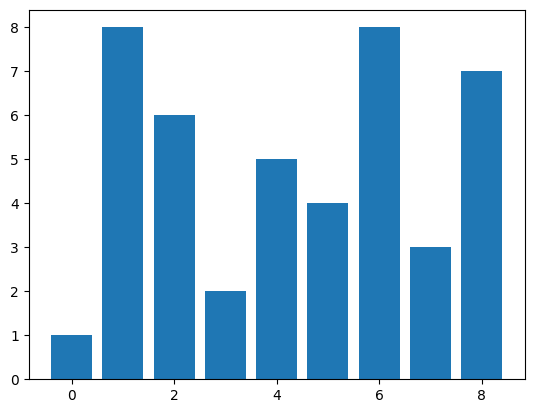

In [16]:
import matplotlib.pyplot as plt
height = [1,8,6,2,5,4,8,3,7]
x=range(len(height))
plt.bar(x,height)
plt.show()
# In below plot the container is formed from index 1 to 8 with aheight of 7.
# We understand below how we got the values.

In [17]:
#Solution1
height = [1,8,6,2,5,4,8,3,7]

max_area = 0
for left_index in range(len(height)):# Here we decide left index
    for right_index in range(left_index + 1, len(height)):#Starting after the above left index, the right index takes up values.
        width = right_index - left_index
        low_height = min(height[left_index], height[right_index])
        
        area = width * low_height
        
        if area > max_area:
            max_area = area
            
print(max_area)     

49


Time complexity: Here we have a nested for loop structure. Thus Time complexity is  O(n^2).

Space complexity: No new data structures are created. Thus, space complexity is O(1).

In [18]:
#Solution2
height = [1,8,6,2,5,4,8,3,7]
max_area = 0

left_index = 0
right_index = len(height)-1

while left_index < right_index:
    width = right_index - left_index# This is difference between indices to get base of container.
    low_height = min(height[left_index], height[right_index])#Here we assign the height of container.
    area = width * low_height# With above two calculated values we find the area.      
    if area > max_area:# Area is compared and updated accordingly!
        max_area = area
    if height[left_index] <= height[right_index]: #Insight: Taking chance. Here we decide which pointer to move!
        """
         We move the lower value because we have chance of getting a larger number that might increase the area.
         Remember the lower of the two heights determines the area.
         We are taking a chance by moving the lower pointer value in case the next value is higher. 
        """
        
        left_index += 1# We are updating only left index!
    else:
        right_index -= 1# We are updating only right index!
print(max_area)

49


With reference to the comments mentioned above we can understand the only left index or right index is being updated in an iteration unlike 2sum and 3 sum problems where we were updating both indices at the same time! This is because: "We are taking a chance by moving the lower pointer value in case the next value is higher."

Time complexity: Due to one while loop the iteration time depens on length of input list. Hence, time complexity is O(n).

Space complexity: As no new data structure is created. Space complexity is O(1).

In [19]:
#2 sum problem
# Solution 1-Brute force lookup
"""
Here 2 for loops are used to search for required values in the list the add up to the target.
Index variables are also checked to avoid repeated additions and additions with element itself.
The algorithm is Naive and time consuming for large datsets
Insight: 2 pointer logic is used wher both pointers are travelling in "SAME" direction from starting to end of list.
"""
def two_sum(nums, target):
    N = len(nums)
    for i in range(N):# First for loop to iterate 1st pointer i.
        val_at_i = nums[i]
        for j in range(N):# 2nd for loop to iterate second pointer j.
            val_at_j = nums[j]
            if (val_at_i + val_at_j) == target and i != j:#Checking if target sum is achieved and indices are different.
                return (val_at_i, val_at_j,f'Index1 is {i}',f'Index2 is {j}')

nums = [1,21,3,14,5,60,7,6,40]
target = 81
print(two_sum(nums, target))

(21, 60, 'Index1 is 1', 'Index2 is 5')


In [20]:
#3 sum solution
# Solution

"""
Here the 3 sum logic can be thought of as a 2 pointer logic in a list whose length is decreasing from one end.
In below exapmle, i - pointer1 is changing length of list. 
left_p and right_p are 2 pointers inside the list created by pointer i
"""
nums = [-1,0,1,2,-1,-4]

def threeSum(nums, target):
    combinations = []
    nums.sort() # n log n
    
    N = len(nums)
    for i in range(0, N-2):#Pointer1
        left_p = i + 1#Pointer2
        right_p = N-1#Pointer3
        
        while (left_p < right_p):
            x, y, z = nums[right_p], nums[i], nums[left_p]
            
            triplet = x + y + z
            print(nums[i:len(nums)],nums[left_p],nums[right_p],f'Target is {target}. Sum is {triplet}.')# Understanding comparisons!
            if triplet == target:#If Target is achieved the values are stored in list named combinations and while loop breaks. 
                combinations.append((x,y,z))
                break
            elif triplet < target:
                left_p += 1
            elif triplet > target:
                right_p -= 1
    return combinations 

print(threeSum(nums, 0))        

[-4, -1, -1, 0, 1, 2] -1 2 Target is 0. Sum is -3.
[-4, -1, -1, 0, 1, 2] -1 2 Target is 0. Sum is -3.
[-4, -1, -1, 0, 1, 2] 0 2 Target is 0. Sum is -2.
[-4, -1, -1, 0, 1, 2] 1 2 Target is 0. Sum is -1.
[-1, -1, 0, 1, 2] -1 2 Target is 0. Sum is 0.
[-1, 0, 1, 2] 0 2 Target is 0. Sum is 1.
[-1, 0, 1, 2] 0 1 Target is 0. Sum is 0.
[0, 1, 2] 1 2 Target is 0. Sum is 3.
[(2, -1, -1), (1, -1, 0)]


In [21]:
#2sum problem: Two pointers are involved. Both pointers move in the same direction
#3sum problem: 3 pointers are involved. One pointer adjusts length of the list from end end.
#Rest of the 2 pointers move between the first pointer and other free end of the list.

References: https://cda500.netlify.app/chapters/intro.html
